

<div class=""alert alert-block alert-success""><h1><b> 
     Persamaan Poisson 2D  </b></h1></div>


Diketahui persamaan Poisson berikut ini

\begin{equation}
\dfrac{\partial^2 u}{\partial x^2} + \dfrac{\partial^2 u}{\partial y^2} = f(x,y)
\end{equation}

akan diterapkan pada domain bujur sangkar $0\le x,y \le 1$, dengan suku sumber dinyatakan dengan

\begin{align} 
f(x,y) = &1000 \left[2\sinh\left(x-\frac{1}{2}\right) + 4\left(x-\frac{1}{2}\right)\cosh\left(x-\frac{1}{2}\right) + \left(x-\frac{1}{2}\right)^2\sinh\left(x-\frac{1}{2}\right)\right] + \nonumber\\
& 1000 \left[2\sinh\left(y-\frac{1}{2}\right) + 4\left(y-\frac{1}{2}\right)\cosh\left(y-\frac{1}{2}\right) + \left(y-\frac{1}{2}\right)^2\sinh\left(y-\frac{1}{2}\right)\right] 
\end{align}

Syarat batas ditetapkan sebagai berikut:

\begin{align} 
u(0,y) & = 1000\left[ \frac{1}{4}\sinh \left( -\frac{1}{2}\right) + \left( y-\frac{1}{2}\right)^2\sinh\left(y-\frac{1}{2}\right) \right] \\
u(1,y) & = 1000\left[ \frac{1}{4}\sinh \left( \frac{1}{2}\right) + \left( y-\frac{1}{2}\right)^2\sinh\left(y-\frac{1}{2}\right) \right] \\
u(x,0) & = 1000\left[  \left( x-\frac{1}{2}\right)^2\sinh\left(x-\frac{1}{2}\right) + \frac{1}{4}\sinh \left( -\frac{1}{2}\right) \right] \\
u(x,1) & = 1000\left[  \left( x-\frac{1}{2}\right)^2\sinh\left(x-\frac{1}{2}\right) + \frac{1}{4}\sinh \left( \frac{1}{2}\right) \right] 
\end{align}

Tentukan solusi menggunakan metode beda hingga. Bandingkan galatnya dengan solusi analitik berikut.

\begin{equation}
u(x,y)  = 1000\left[ \left( x-\frac{1}{2}\right)^2\sinh\left(x-\frac{1}{2}\right) + \left( y-\frac{1}{2}\right)^2\sinh\left(y-\frac{1}{2}\right) \right]
\end{equation}

## Diskretisasi

Kita lakukan diskretisasi ruang menggunakan metode beda hingga (*finite difference*).

$$\left.\frac{\partial^2 u}{\partial x^2}\right|_{i,j} \approx \frac{u_{i+1,j} - 2u_{i,j}+u_{i-1,j}}{\Delta x^2}$$

$$\left.\frac{\partial^2 u}{\partial y^2}\right|_{i,j} \approx \frac{u_{i,j+1} - 2u_{i,j}+u_{i,j-1}}{\Delta y^2}$$

Dengan mensubstitusi persamaan diferensi di atas ke persamaan Poisson, akan didapatkan

$$\left(\frac{u_{i+1,j} - 2u_{i,j}+u_{i-1,j}}{\Delta x^2}\right) + \left(\frac{u_{i,j+1} - 2u_{i,j}+u_{i,j-1}}{\Delta y^2}\right) = f_{i,j}$$

atau

$$\frac{1}{\Delta x^2} u_{i-1,j} + \frac{1}{\Delta x^2} u_{i+1,j} - \left(\dfrac{2}{\Delta x^2} + \dfrac{2}{\Delta y^2} \right) u_{i,j}  + \frac{1}{\Delta y^2} u_{i,j-1} + \frac{1}{\Delta y^2} u_{i,j+1} = f_{i,j}$$

Kita akan menyelesaikan persamaan diferensi ini menggunakan metode langsung, sehingga kita perlu menyusun matriks **[A]** untuk menyelesaikan persamaan matriks berikut

$$\mathbf{[A][u]} = \mathbf{[f]} $$

Kita tentukan banyaknya interval ke arah sumbu *x* sebanyak $N$ dan interval ke arah sumbu $y$ sebanyak $M$. Dengan demikian akan diperoleh $N+1$ titik ke arah sumbu $x$ dan $M+1$ titik ke arah sumbu $y$. Matriks $\mathbf{[A]}$ yang akan kita susun  berukuran $(N+1)(M+1) \times (N+1)(M+1)$ elemen.

## Coding

Pertama kita tentukan terlebih dahulu banyaknya interval dan menginisialisasi semua variabel yang diperlukan.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time

In [23]:
# Langkah 1

N = 100                            # banyaknya interval arah x
M = 100                            # banyaknya interval arah y

xmin = 0                         # batas bawah domain arah x
xmax = 1                         # batas atas domain arah x

ymin = 0                         # batas bawah domain arah y
ymax = 1                         # batas atas domain arah y

# tentukan lebar interval
dx = (xmax-xmin)/N             
dy = (ymax-ymin)/M 

# nilai kuadrat dari interval
dx2 = dx**2
dy2 = dy**2

# nilai diskret dari x dan y
x = np.linspace(xmin,xmax,N+1)
y = np.linspace(ymin,ymax,N+1)

# inisialisasi
A = np.zeros(((N+1)*(M+1), (N+1)*(M+1)))            # matriks A
u = np.zeros((N+1)*(M+1))                 # vektor u
f = np.zeros((N+1)*(M+1))                 # vektor f
u2d = np.zeros(((N+1),(M+1)))           # matriks u untuk plotting 2 dimensi
uanal = np.zeros(((N+1),(M+1)))         # matriks solusi analitis untuk plotting 2 dimensi

Berikutnya kita susun matriks $\mathbf{[A]}$ dan vektor $\mathbf{[f]}$

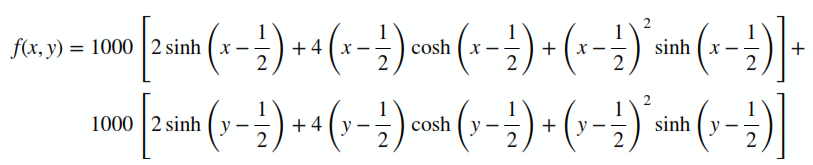

In [42]:
print([x for x in range(1,7)])

[1, 2, 3, 4, 5, 6]


In [49]:
# create matrix A and vector f

# Untuk mapping dari (i,j) ke k, lihat slide kuliah.


# Langkah 2 :

# Inner grids

for i in range(1,N):
    for j in range(1,M):
        k = j*(N+1)+i                         # lakukan mapping dari (i,j) ke k
        
        A[k,k] = (2/dx2)+(2/dy2)                    # titik o
        A[k,k-1] = A[k,k+1] = -1/dx2       # titik west dan east
        A[k,k-N-1] = A[k,k+N+1] = -1/dy2   # titik south dan north
        
        f[k] = 1000*(2*np.sinh(x[i]-0.5) + 4*(x[i]-0.5)*np.cosh(x[i]-0.5) + (x[i]-0.5)**2*np.sinh(x[i]-0.5))\
            + 1000*(2*np.sinh(y[j]-0.5) + 4*(y[j]-0.5)*np.cosh(y[j]-0.5) + (y[j]-0.5)**2*np.sinh(y[j]-0.5))

        
# Langkah 3: 

# Grids batas kiri  dan kanan domain       
for i in [0,N]:
    for j in range(M+1):
        k = j*(N+1)+i 
        A[k,k] = 1 
        if i == 0:
            u[k] = 1000*(0.25*np.sinh(-0.5) + (y[j] - 0.5)**2 * np.sinh(y[j]-0.5)) # BC u(0,y) / kiri domain
        else:
            u[k] = 1000*(0.25*np.sinh(0.5) + (y[j] - 0.5)**2 * np.sinh(y[j]-0.5))  # BC u(1,y) / kanan domain
        f[k] = u[k]

# Langkah 4:
# Grids batas bawah dan atas    
for j in [0,M]:
    for i in range(N+1):
        k = j*(N+1)+i
        A[k,k] = 1
        if j == 0:
            u[k] = 1000*((x[i] - 0.5)**2 * np.sinh(x[i]-0.5) + 0.25*np.sinh(-0.5))  # BC u(x,0) / bawah domain
        else:
            u[k] = 1000*((x[i] - 0.5)**2 * np.sinh(x[i]-0.5) + 0.25*np.sinh(0.5))   # BC u(x,1) / atas domain
        f[k] = u[k]



Mari kita cek bagaimana bentuk matriks $\mathbf{[A]}$.

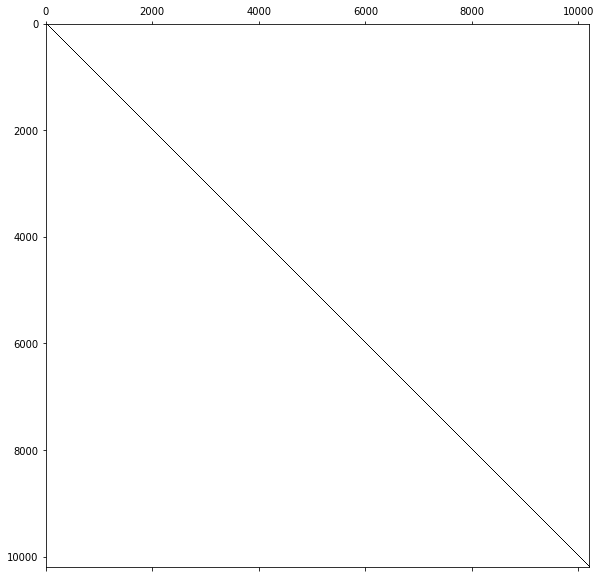

[-260.54765275 -252.68758996 -245.16175077 ...  245.16175077  252.68758996
  260.54765275]


In [50]:
plt.figure(figsize=(10,10))
plt.spy(A)
plt.show()
print(u)

Tampak bahwa matriks $\mathbf{[A]}$ merupakan *sparse matrix* di mana banyak elemen-elemennya bernilai 0 dan elemen yang tidak bernilai 0 akan membentuk *penta diagonal* (diagonal 5 baris).

Setelah tersusun matriks $\mathbf{[A]}$ dan vektor $\mathbf{[f]}$ selanjutnya kita selesaikan persamaan matriks.

<div class="alert alert-block alert-warning"><h3><b> Metode Langsung </b></h3></div>

Pertama kita akan gunakan metode solusi langsung.

In [51]:
# Langkah 5:

tic = time.time()
# Selesaikan menggunakan numpy
u = np.linalg.solve(A, u)
toc = time.time()
print("waktu =",toc-tic)


# Perlu dilakukan remapping untuk membentuk matriks 2D dari vektor
u2d = np.reshape(u, ((N+1),(M+1)))

# Transpose untuk menyesuaikan plot
u2d = u2d.T

waktu = 11.713301658630371


Kita tampilkan hasilnya secara numerik terlebih dahulu

In [52]:
print("u =",u)
print("u2d =",u2d)

u = [-260.54765275 -252.68758996 -245.16175077 ...  245.16175077  252.68758996
  260.54765275]
u2d = [[-2.60547653e+02 -2.52687590e+02 -2.45161751e+02 ... -1.53859020e+01
  -7.86006279e+00  0.00000000e+00]
 [-2.52687590e+02 -2.46142148e+02 -2.39602478e+02 ... -7.53369254e+00
  -1.62441312e-11  7.86006279e+00]
 [-2.45161751e+02 -2.39602478e+02 -2.33919832e+02 ...  3.34490323e-11
   7.53369254e+00  1.53859020e+01]
 ...
 [-1.53859020e+01 -7.53369254e+00 -6.06843969e-11 ...  2.33919832e+02
   2.39602478e+02  2.45161751e+02]
 [-7.86006279e+00 -1.68191036e-11  7.53369254e+00 ...  2.39602478e+02
   2.46142148e+02  2.52687590e+02]
 [ 0.00000000e+00  7.86006279e+00  1.53859020e+01 ...  2.45161751e+02
   2.52687590e+02  2.60547653e+02]]


Kita akan bandingkan hasil komputasi kita dengan solusi analitik dan tampilkan nilai galatnya.

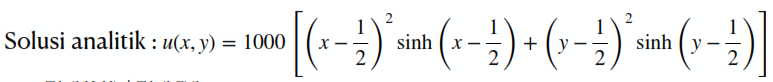

In [53]:
# Langkah 6 :


# Analytic solution

for i in range(N+1):
    for j in range(M+1):
        uanal[i,j] = 1000*(((x[i]-1/2)**2)*np.sinh(x[i]-1/2)+((y[j]-1/2)**2)*np.sinh(y[j]-1/2))

# Transpose untuk menyesuaikan plot
uanal = uanal.T

# Nilai galat
galat = u2d - uanal

# tampilkan galat
print("galat =", galat)

galat = [[ 0.00000000e+00  0.00000000e+00  1.70530257e-13 ...  2.71072054e-12
  -9.63913394e-11  0.00000000e+00]
 [-8.52651283e-14 -1.31462092e+00 -2.30079037e+00 ... -7.85335022e-03
  -1.62441312e-11  0.00000000e+00]
 [ 1.98951966e-12 -2.30079037e+00 -4.14398352e+00 ...  3.34490323e-11
   7.85335025e-03  0.00000000e+00]
 ...
 [ 2.30926389e-14 -7.85335027e-03 -6.06843969e-11 ...  4.14398352e+00
   2.30079037e+00  0.00000000e+00]
 [ 1.10134124e-13 -1.68191036e-11  7.85335020e-03 ...  2.30079037e+00
   1.31462092e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  7.14628356e-12 ...  2.39879228e-11
   0.00000000e+00  0.00000000e+00]]


Selanjutnya kita akan membuat plot hasil serta galatnya. Kita coba buat 4 plot yaitu : (1) plot hasil dalam 2D, (2) plot hasil dalam 3D, (3) plot hasil dalam bentuk kontur dan (4) plot kontur dari galat.

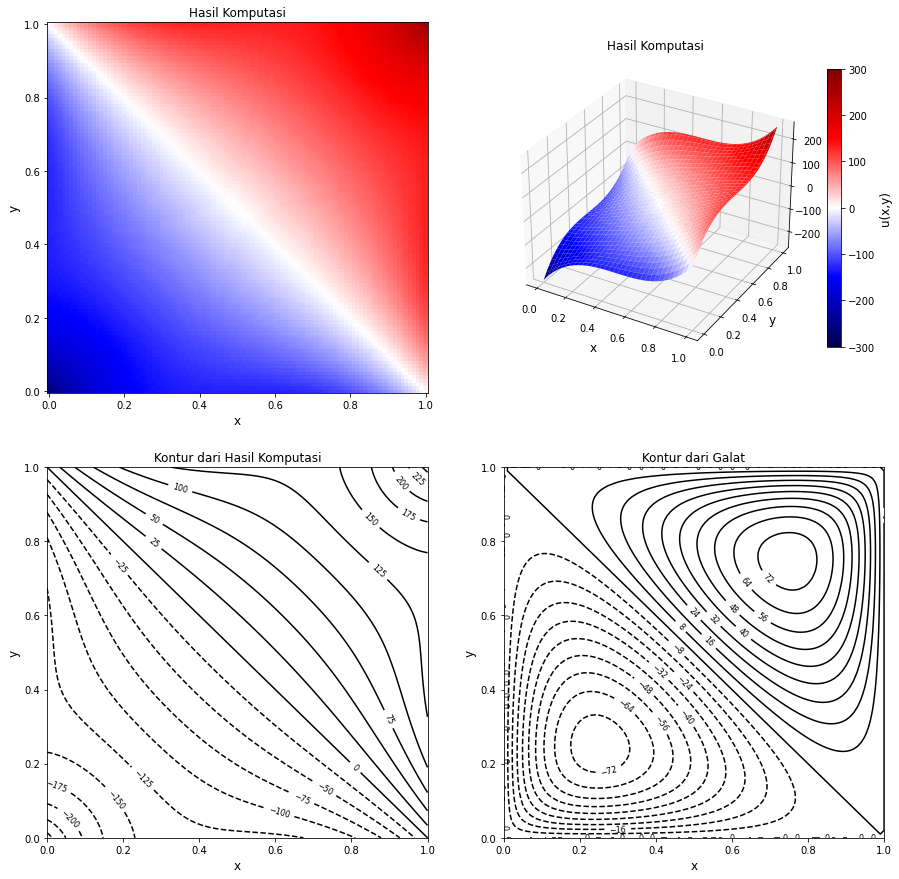

In [54]:
# plot

X, Y = np.meshgrid(x,y)             # susun meshgrid untuk plot 3D
fig = plt.figure(figsize=(15,15))
cmap = mpl.cm.get_cmap('seismic')   # tentukan colormap sesuai keinginan

# subplot pertama menampilkan hasil dalam bentuk plot 2D
ax = fig.add_subplot(2,2,1)
c = ax.pcolor(X,Y,u2d, vmin=-300, vmax=300, cmap=cmap,shading='auto')
ax.set_xlabel(r"x", fontsize=12)
ax.set_ylabel(r"y", fontsize=12)
ax.set_title("Hasil Komputasi")

# subplot kedua menampilkan hasil dalam bentuk plot 3D
ax = fig.add_subplot(2,2,2, projection='3d')
p = ax.plot_surface(X,Y, u2d, vmin=-300, vmax=300, linewidth=0, cmap=cmap)
ax.set_xlabel(r"x", fontsize=12)
ax.set_ylabel(r"y", fontsize=12)
ax.set_title("Hasil Komputasi")
cb = plt.colorbar(p, ax=ax, shrink=0.75)
cb.set_label(r"u(x,y)", fontsize=12)

# subplot ketiga menampilkan hasil dalam bentuk kontur
ax = fig.add_subplot(2,2,3)
contours = plt.contour(X,Y,u2d, 20, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
ax.set_title("Kontur dari Hasil Komputasi")

# subplot keempat menampilkan kontur dari galat
ax = fig.add_subplot(2,2,4)
contours = plt.contour(X,Y,galat, 20, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
ax.set_title("Kontur dari Galat")

plt.show()

Silakan mencoba dengan jumlah interval solusi yang lebih banyak, untuk mengetahui bagaimana pengaruhnya terhadap solusi dan galatnya.

<div class="alert alert-block alert-warning"><h3><b> Metode Iteratif </b></h3></div>

Selanjutnya kita coba menggunakan metode iteratif sebagai perbandingan. Dalam hal ini kita gunakan metode GMRES dengan *ILU preconditioning*

In [30]:
import scipy.sparse as sparse
import scipy.sparse.linalg as sla
from scipy.sparse import csc_matrix

In [31]:
# Preconditioning

B = csc_matrix(A, dtype=float)
ILUfact = sla.spilu(B)

C = sla.LinearOperator(
    shape = B.shape,
    matvec = lambda b: ILUfact.solve(b)
)

# Langkah 7:

# mencari solusi menggunakan GMRES 
tic = ...
ugmres, exit = sla.gmres(..., ..., ...)
toc = ...

print("waktu =",toc-tic)

RuntimeError: Factor is exactly singular

In [ ]:
Langkah 8:

# Perlu dilakukan remapping untuk membentuk matriks 2D dari vektor
u2dgmres = np.reshape(..., ...)

# Transpose untuk menyesuaikan plot
u2dgmres = u2dgmres.T

# Tampilkan nilai numerik dari hasil
print("ugmres =",ugmres)
print("u2dgmres =",u2dgmres)


# Nilai galat
galatgmres = u2dgmres - uanal

# Tampilkan nilai numerik dari galat
print("galatgmres =",galatgmres)

In [ ]:
# plot

X, Y = np.meshgrid(x,y)             # susun meshgrid untuk plot 3D
fig = plt.figure(figsize=(15,15))
cmap = mpl.cm.get_cmap('seismic')   # tentukan colormap sesuai keinginan

# subplot pertama menampilkan hasil dalam bentuk plot 2D
ax = fig.add_subplot(2,2,1)
c = ax.pcolor(X,Y,u2dgmres, vmin=-300, vmax=300, cmap=cmap,shading='auto')
ax.set_xlabel(r"x", fontsize=12)
ax.set_ylabel(r"y", fontsize=12)
ax.set_title("Hasil Komputasi")

# subplot kedua menampilkan hasil dalam bentuk plot 3D
ax = fig.add_subplot(2,2,2, projection='3d')
p = ax.plot_surface(X,Y, u2dgmres, vmin=-300, vmax=300, linewidth=0, cmap=cmap)
ax.set_xlabel(r"x", fontsize=12)
ax.set_ylabel(r"y", fontsize=12)
ax.set_title("Hasil Komputasi")
cb = plt.colorbar(p, ax=ax, shrink=0.75)
cb.set_label(r"u(x,y)", fontsize=12)

# subplot ketiga menampilkan hasil dalam bentuk kontur
ax = fig.add_subplot(2,2,3)
contours = plt.contour(X,Y,u2dgmres, 20, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
ax.set_title("Kontur dari Hasil Komputasi")

# subplot keempat menampilkan kontur dari galat
ax = fig.add_subplot(2,2,4)
contours = plt.contour(X,Y,galatgmres, 20, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
ax.set_title("Kontur dari Galat")

plt.show()